In [2]:
!pip install pycaret
!pip install shap
!pip install graphviz
!pip install dtreeviz

# Data cleaning and Modelling.  

In [1]:

#general
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
from dtreeviz.trees import *


from pycaret.classification import *
import pandas_datareader as web


In [6]:
transactions_ready = pd.read_csv('./../datasets/final_transactions_dataset.csv')
df_to_ml = transactions_ready[['investment','company','sector','horizon (days)','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking', 'EPS_ratio', 'PS_ratio','PB_ratio','NetProfitMargin_ratio','current_ratio','roa_ratio','roe_ratio']]

In [7]:
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,BAD,BBY,RETAIL,2,100,0.383666,0.385748,0.383666,0.001437,12.58,12.0,3.73,0.38,3.19,3.01,1.49,8.69,26.69
1,GOOD,BAC,BANK,330,15000,0.322809,0.236350,0.322809,0.170969,11.39,26.3,1.26,1.71,0.54,15.70,0.92,0.67,5.54
2,BAD,AXP,BANK,7,3000,0.238642,0.235491,0.238642,0.002824,10.58,19.8,5.64,1.67,2.60,15.68,1.91,3.39,25.78
3,BAD,KSS,RETAIL,5,20000,0.428559,0.429340,0.428559,0.000094,11.09,12.9,3.27,0.36,1.25,3.17,1.60,4.41,11.35
4,GOOD,JPM,BANK,360,15000,0.194612,0.254011,0.194612,0.149979,9.38,27.9,5.46,1.87,0.81,19.91,0.99,0.81,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405253,BAD,GM,AUTO,480,50000,0.241103,0.253235,0.241103,0.053763,23.98,30.6,1.19,0.31,1.07,1.29,1.27,1.18,4.87
405254,GOOD,SC,BANK,300,50000,0.410470,0.535448,0.410470,0.009444,4.40,26.9,2.16,0.50,0.74,11.58,0.92,2.16,17.79
405255,GOOD,HOG,AUTO,210,3000,0.316220,0.359625,0.316220,0.025642,12.02,16.3,3.71,1.46,4.27,12.06,1.74,7.02,31.43
405256,BAD,AAPL,TECH,270,500,0.173693,0.218904,0.173693,0.181797,16.74,16.5,2.43,3.55,5.90,21.12,1.24,13.83,37.37


In [8]:
investment_map = {'GOOD':1, 'BAD':0} 
df_to_ml = df_to_ml.applymap(lambda s: investment_map.get(s) if s in investment_map else s)

In [9]:
company_map = {'AAPL':0,
 'AMZN':1,
 'MSFT':2,
 'GOOG':3,
 'FB':4,
 'NVDA':5,
 'F':6,
 'GM':7,
 'HMC':8,
 'TSLA':9,
 'TYO':10,
 'HOG':11,
 'WMT':12,
 'M':13,
 'TGT':14,
 'KSS':15,
 'COST':16,
 'BBY':17,
 'KO':18,
 'PEP':19,
 'PG':20,
 'OR':21,
 'AXP':22,
 'SC':23,
 'DB':24,
 'UBS':25,
 'BAC':26,
 'JPM':27}
df_to_ml = df_to_ml.applymap(lambda s: company_map.get(s) if s in company_map else s)

In [10]:
sector_map = {'TECH':0, 'AUTO':1, 'RETAIL': 2 , 'FMCG': 3, 'BANK':4}
df_to_ml = df_to_ml.applymap(lambda s: sector_map.get(s) if s in sector_map else s)
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,17,2,2,100,0.383666,0.385748,0.383666,0.001437,12.58,12.0,3.73,0.38,3.19,3.01,1.49,8.69,26.69
1,1,26,4,330,15000,0.322809,0.236350,0.322809,0.170969,11.39,26.3,1.26,1.71,0.54,15.70,0.92,0.67,5.54
2,0,22,4,7,3000,0.238642,0.235491,0.238642,0.002824,10.58,19.8,5.64,1.67,2.60,15.68,1.91,3.39,25.78
3,0,15,2,5,20000,0.428559,0.429340,0.428559,0.000094,11.09,12.9,3.27,0.36,1.25,3.17,1.60,4.41,11.35
4,1,27,4,360,15000,0.194612,0.254011,0.194612,0.149979,9.38,27.9,5.46,1.87,0.81,19.91,0.99,0.81,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405253,0,7,1,480,50000,0.241103,0.253235,0.241103,0.053763,23.98,30.6,1.19,0.31,1.07,1.29,1.27,1.18,4.87
405254,1,23,4,300,50000,0.410470,0.535448,0.410470,0.009444,4.40,26.9,2.16,0.50,0.74,11.58,0.92,2.16,17.79
405255,1,11,1,210,3000,0.316220,0.359625,0.316220,0.025642,12.02,16.3,3.71,1.46,4.27,12.06,1.74,7.02,31.43
405256,0,0,0,270,500,0.173693,0.218904,0.173693,0.181797,16.74,16.5,2.43,3.55,5.90,21.12,1.24,13.83,37.37


In [12]:
df_to_ml.to_csv('df_to_ml.csv')

In [13]:
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,17,2,2,100,0.383666,0.385748,0.383666,0.001437,12.58,12.0,3.73,0.38,3.19,3.01,1.49,8.69,26.69
1,1,26,4,330,15000,0.322809,0.236350,0.322809,0.170969,11.39,26.3,1.26,1.71,0.54,15.70,0.92,0.67,5.54
2,0,22,4,7,3000,0.238642,0.235491,0.238642,0.002824,10.58,19.8,5.64,1.67,2.60,15.68,1.91,3.39,25.78
3,0,15,2,5,20000,0.428559,0.429340,0.428559,0.000094,11.09,12.9,3.27,0.36,1.25,3.17,1.60,4.41,11.35
4,1,27,4,360,15000,0.194612,0.254011,0.194612,0.149979,9.38,27.9,5.46,1.87,0.81,19.91,0.99,0.81,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405253,0,7,1,480,50000,0.241103,0.253235,0.241103,0.053763,23.98,30.6,1.19,0.31,1.07,1.29,1.27,1.18,4.87
405254,1,23,4,300,50000,0.410470,0.535448,0.410470,0.009444,4.40,26.9,2.16,0.50,0.74,11.58,0.92,2.16,17.79
405255,1,11,1,210,3000,0.316220,0.359625,0.316220,0.025642,12.02,16.3,3.71,1.46,4.27,12.06,1.74,7.02,31.43
405256,0,0,0,270,500,0.173693,0.218904,0.173693,0.181797,16.74,16.5,2.43,3.55,5.90,21.12,1.24,13.83,37.37


In [99]:
df_to_ml = pd.read_csv('df_to_ml.csv')
df_to_ml.pop("Unnamed: 0")
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,6,1,540,1500,0.196354,0.293787,0.196354,-0.017719,9.24,29.7,1.10,0.26,1.24,2.87,1.20,1.80,14.11
1,1,16,2,50,20000,0.173889,0.173576,0.173889,0.022934,23.14,22.3,5.37,0.47,5.02,2.05,1.02,7.06,21.29
2,0,24,4,360,25000,0.316405,0.342725,0.316405,-0.139001,0.00,30.0,0.50,0.81,0.50,1.97,0.84,0.05,1.10
3,1,5,0,720,200,0.224153,0.378325,0.224153,0.972724,18.37,12.9,0.91,2.21,2.10,12.06,6.19,7.94,12.31
4,1,2,0,2,15000,0.189607,0.189519,0.189607,0.001196,16.10,14.7,2.55,3.76,3.76,23.35,2.52,13.12,24.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171649,1,19,3,420,1500,0.156638,0.123930,0.156638,0.091368,23.49,17.6,3.67,2.04,10.38,8.65,1.31,7.75,37.56
171650,1,17,2,210,15000,0.357899,0.381552,0.357899,0.150911,10.45,12.0,3.83,0.33,2.64,3.12,1.48,9.00,27.73
171651,0,12,2,600,300,0.115018,0.214233,0.115018,0.159507,14.01,27.3,4.85,0.47,2.81,3.32,0.88,7.74,20.12
171652,0,14,2,1,2000,0.297174,0.297174,0.297174,0.000313,12.34,14.8,5.45,0.50,3.21,4.03,0.90,7.39,26.28


# Model Selection

In [100]:

ml_model = setup(df_to_ml, target = 'investment')

,Description,Value
0,session_id,7475
1,Target,investment
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(171654, 18)"
5,Missing Values,True
6,Numeric Features,15
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [101]:
best_models = compare_models(exclude=['catboost'] ,n_select=10)

## Decission Tree analysis

In [5]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7203,0.7144,0.7505,0.7661,0.7583,0.4266,0.4268
1,0.7351,0.7268,0.7758,0.7720,0.7739,0.4541,0.4542
2,0.7294,0.7227,0.7618,0.7721,0.7669,0.4444,0.4444
3,0.7177,0.7094,0.7611,0.7573,0.7592,0.4183,0.4183
4,0.7325,0.7259,0.7646,0.7749,0.7697,0.4508,0.4509
5,0.7288,0.7234,0.7569,0.7743,0.7655,0.4442,0.4444
6,0.7445,0.7378,0.7765,0.7842,0.7804,0.4749,0.4749
7,0.7383,0.7308,0.7751,0.7768,0.7759,0.4614,0.4614
8,0.7165,0.7077,0.7590,0.7568,0.7579,0.4160,0.4160
9,0.7284,0.7171,0.7836,0.7595,0.7714,0.4372,0.4375


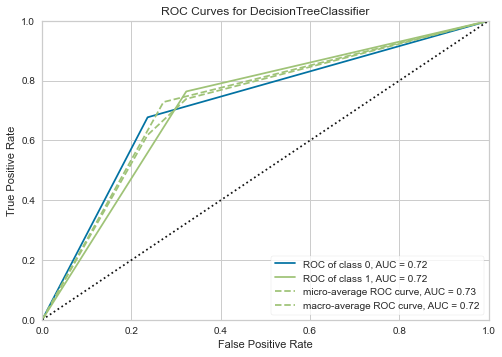

In [10]:
plot_model(dt)

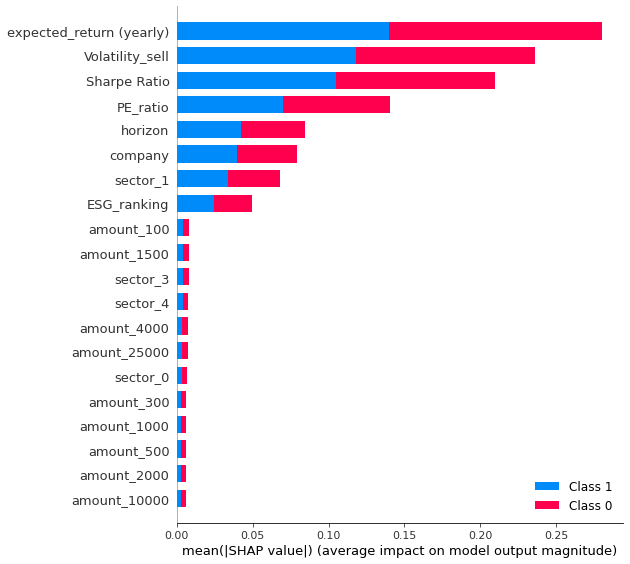

In [7]:
interpret_model(dt)

In [16]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6402,0.6667,0.7927,0.6600,0.7203,0.2279,0.2355
1,0.6616,0.7023,0.8658,0.6606,0.7494,0.2565,0.2797
2,0.6665,0.6974,0.8335,0.6735,0.7450,0.2787,0.2922
3,0.6537,0.6907,0.8320,0.6622,0.7375,0.2476,0.2618
4,0.6495,0.6892,0.8489,0.6544,0.7391,0.2319,0.2508
5,0.6594,0.7091,0.8721,0.6573,0.7496,0.2487,0.2742
6,0.6680,0.7036,0.8433,0.6723,0.7481,0.2791,0.2949
7,0.6684,0.7201,0.8623,0.6676,0.7525,0.2742,0.2956
8,0.6290,0.6676,0.7871,0.6512,0.7127,0.2022,0.2095
9,0.6524,0.6997,0.8791,0.6499,0.7473,0.2289,0.2574


In [17]:
final_dt = finalize_model(tuned_dt)
final_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1768, splitter='best')

## Decission Tree Visualization


In [21]:
graph_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1768, splitter='best')

In [22]:
X=df_to_ml.drop('investment',1)
y=df_to_ml['investment']

In [23]:
model_dt = graph_dt.fit(X,y)

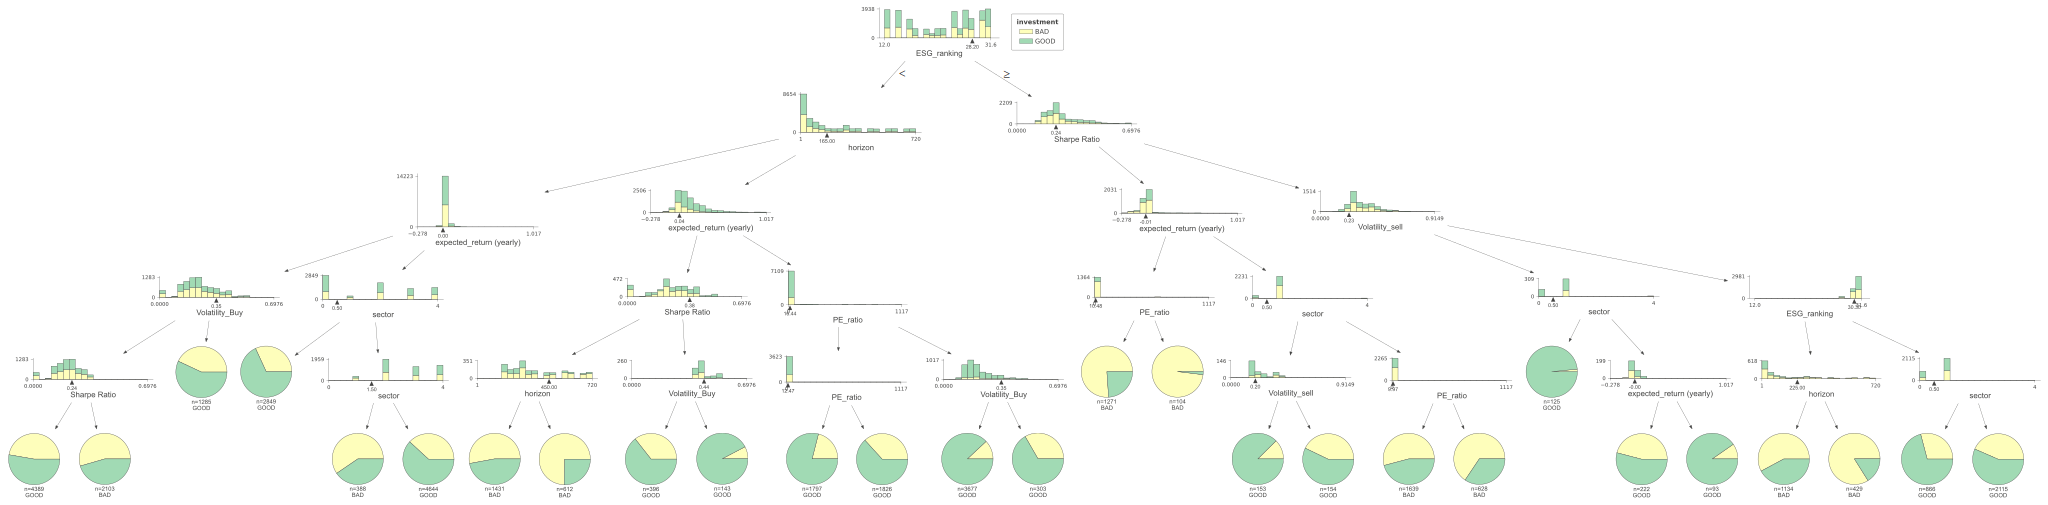

In [24]:
viz = dtreeviz(model_dt, X, y,
                target_name="investment",
                feature_names=['company','sector','horizon','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking'],
                class_names=["BAD", "GOOD"])
viz.save('decision_tree_5.svg')
viz